In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\Users\admin\Wholesale customers data.csv')

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
from sklearn.preprocessing import normalize  #same as Minmax scaler

In [8]:
df1=normalize(df)

In [9]:
df=pd.DataFrame(df1,columns=df.columns)

In [10]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [11]:
import scipy.cluster.hierarchy as shc

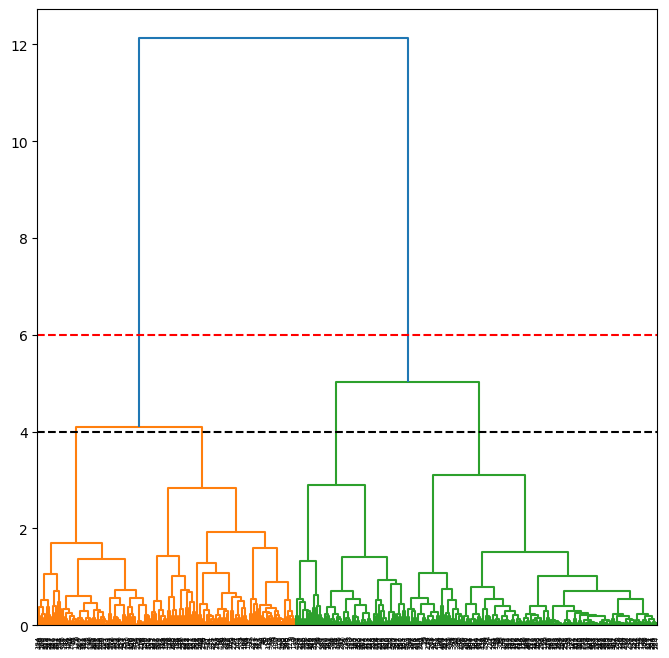

In [12]:
plt.figure(figsize=(8,8))
den=shc.dendrogram(shc.linkage(df,method='ward'))
plt.axhline(6,linestyle='--',color='red')
plt.axhline(4,linestyle='--',color='black')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
ac=AgglomerativeClustering(n_clusters=2)  #2 is value of k

In [15]:
ypred=ac.fit_predict(df)

In [16]:
ypred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [17]:
df['Cluster']=ypred  #feature engineering

In [18]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,1
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,1
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,1
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,0
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,0


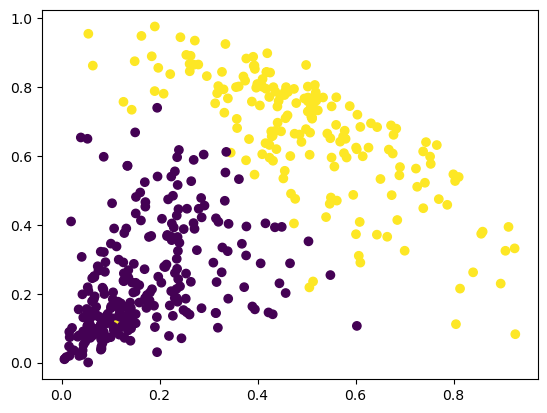

In [19]:
plt.scatter(df['Milk'],df['Grocery'],c=ac.labels_)

###     06.09.2023                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

### Association Rule

In [28]:
df=pd.read_csv(r'C:\Users\admin\GroceryStoreDataSet.csv',header=None,names=['Product'])
df

,Product
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MILK,BREAD,BISCUIT  19 non-null     object
dtypes: object(1)
memory usage: 284.0+ bytes


In [22]:
df.describe()

,"MILK,BREAD,BISCUIT"
count,19
unique,16
top,"BREAD,TEA,BOURNVITA"
freq,2


In [23]:
!pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
     -------                                  0.3/1.4 MB 5.3 MB/s eta 0:00:01
     ------------                             0.4/1.4 MB 5.1 MB/s eta 0:00:01
     -----------------                        0.6/1.4 MB 4.6 MB/s eta 0:00:01
     ----------------------                   0.7/1.4 MB 4.7 MB/s eta 0:00:01
     ------------------------                 0.8/1.4 MB 4.4 MB/s eta 0:00:01
     ----------------------------             1.0/1.4 MB 3.9 MB/s eta 0:00:01
     ------------------------------------     1.2/1.4 MB 3.9 MB/s eta 0:00:01
     ---------------------------------------  1.4/1.4 MB 3.9 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 3.7 MB/s eta 0:00:00


In [26]:
#apriori is Tech of association rule
from mlxtend.frequent_patterns import apriori,association_rules

In [29]:
def breakdata(data):
    return data.split(',')

In [36]:
data=list(df['Product'].apply(breakdata))

In [37]:
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [38]:
from mlxtend.preprocessing import TransactionEncoder

In [40]:
te=TransactionEncoder()
finaldata=te.fit_transform(data)

In [41]:
finaldata

array([[ True, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False,  True, False, False,  True, False, False,  True,
        False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True,  True,
        False, False],
       [ True, False, False, False, False, False, False,  True, False,
        False,  True],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False, False, False, False,  True, False,  True, False,
        False,  True],
       [ True, False,  True, False, False, False, False,  True, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True, False,
        False,  True],
       [False, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False, False,  True,  True,  True, False, Fal

In [43]:
print(te.columns_)

['BISCUIT', 'BOURNVITA', 'BREAD', 'COCK', 'COFFEE', 'CORNFLAKES', 'JAM', 'MAGGI', 'MILK', 'SUGER', 'TEA']


In [44]:
df=pd.DataFrame(finaldata,columns=te.columns_)
df.replace(True,1,inplace=True)
df.replace(False,0,inplace=True)

In [45]:
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


In [46]:
scores=apriori(df,min_support=0.2,use_colnames=True)

C:\Users\admin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [47]:
scores

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.30,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.30,(SUGER)
8,0.35,(TEA)
9,0.20,"(BISCUIT, BREAD)"


In [51]:
score_rules=association_rules(scores,min_threshold=0.5)

In [52]:
score_rules  #(antecedents)=if,(consequents)=then

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCUIT),(BREAD),0.35,0.65,0.2,0.571429,0.879121,-0.0275,0.816667,-0.174603
1,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.750000,0.250000
2,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.050000,0.035714
3,(TEA),(BREAD),0.35,0.65,0.2,0.571429,0.879121,-0.0275,0.816667,-0.174603
4,(COFFEE),(CORNFLAKES),0.40,0.30,0.2,0.500000,1.666667,0.0800,1.400000,0.666667
5,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.800000,0.571429
6,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.800000,0.571429
7,(COFFEE),(SUGER),0.40,0.30,0.2,0.500000,1.666667,0.0800,1.400000,0.666667
8,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.250000,0.750000
9,(TEA),(MAGGI),0.35,0.25,0.2,0.571429,2.285714,0.1125,1.750000,0.865385
